# 7 Linked List 1

## 7.1 추상적 자료구조 Abstract Data Structures 

### 7.1.1 Data

e.g) 정수, 문자열, 레코드, ...

### 7.1.2 A set of operations

e.g) 삽입, 삭제, 순회, ...

e.g) 정렬, 탐색, ...

## 7.2 단순 연결 리스트 Singly Linked List 

각 노드에는, 

- data
- next

head, tail, # of nodes 등을 구현해서 class로 추상화시키면 그것이 단순 연결 리스트의 추상적 자료구조가 된다. 

In [2]:
class Node:
    def __init__(self, item):
        self.data = item
        self.next = None

In [2]:
class LinkedList:
    def __init__(self):
        self.nodeCount = 0
        self.head = None
        self.tail = None

연산을 정의해보자. 

1. 특정 원소 참조 (k번째)
2. 리스트 순회
3. 길이 얻어내기 

이 때, 첫 노드를 0번째로 하지 않고 1번째로 하고, 0번은 따로 빼놓을 것이다. 

In [3]:
class LinkedList:
    def __init__(self):
        self.nodeCount = 0
        self.head = None
        self.tail = None
        
    def getAt(self, pos):
        if pos <= 0 or pos > self.nodeCount:
            raise Exception('Invalid position')
        
        i = 1
        current = self.head
        while i < pos:
            current = current.next
            i += 1
        
        return current
    
    def traverse(self): 
        ans = []
        
        cursor = self.head
        if cursor is None:
            return ans
        
        while cursor.next is not None:
            ans.append(cursor.data)
            cursor = cursor.next
        else:
            ans.append(cursor.data)
            
        return ans

이와 같이 linked list를 구현할 때 `traverse()` 하는 것이 단순히 `getAt()`을 반복하는 것이 되어선 안된다. 

`getAt()`은 한 단계식 다 거쳐 해당 인덱스를 찾는 것이기 때문에 그냥 단순히 이를 리스트에 `append` 하여 답을 구한다면 그건 사실상 한 번씩만 방문하는 traverse가 아니기 때문이다. 

따라서 위와 같이 구현해야 한다. 이 때 return 값으로 node가 아니고 node의 data가 들어가야 했었다는 점을 주의하자. 어이없게 케이스를 통과 못했었다. 

배열과 연결리스트의 차이는 무엇인가?

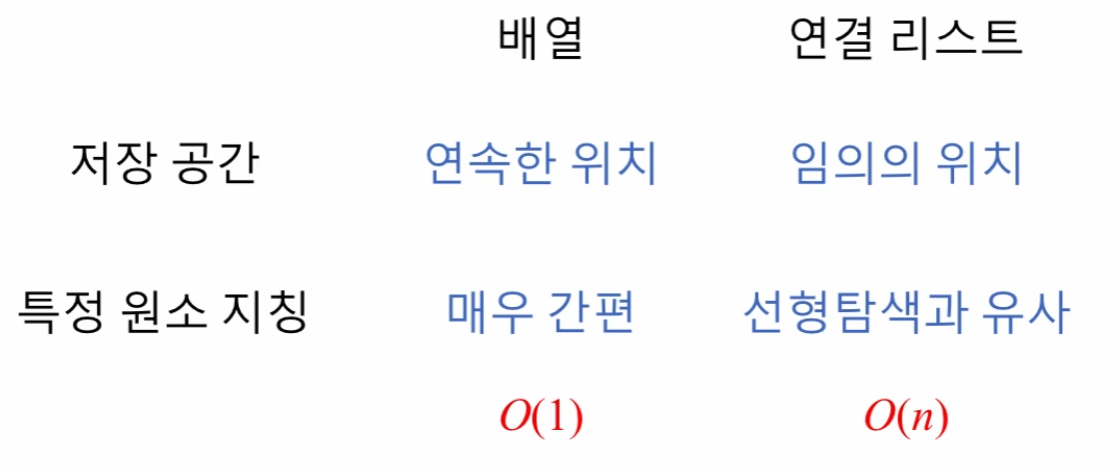



# 8 Linked List 2

연산을 이어서 정의하자. 

4. 원소 삽입
5. 원소 삭제
6. 두 리스트 합치기 

## 8.1 원소의 삽입

우선 원소의 삽입을 해보자. 

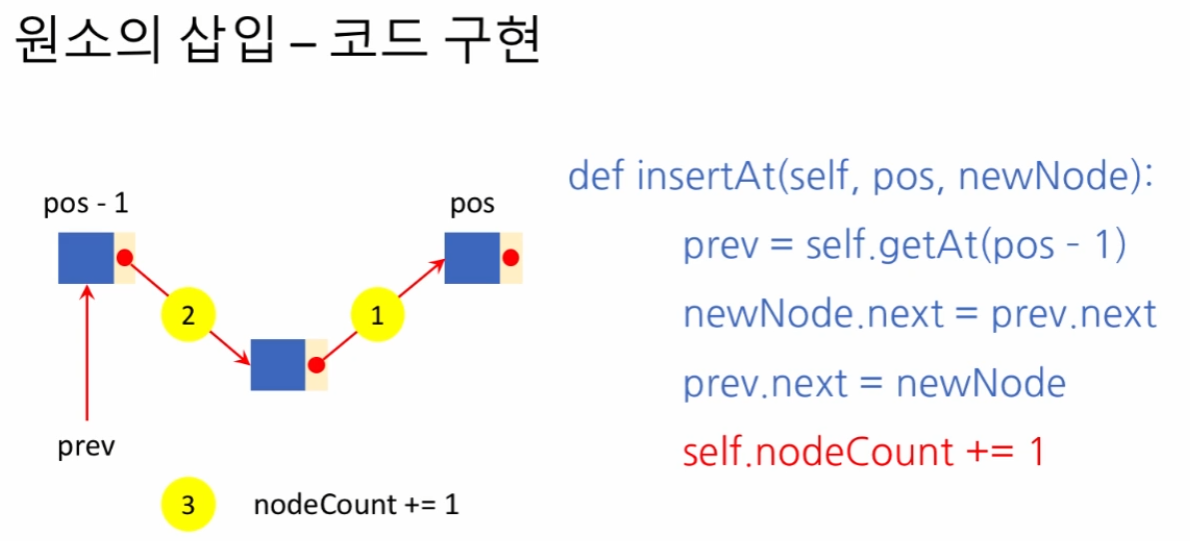

하지만 corner case를 잘 생각해야 한다. 

1. 삽입하려는 위치가 리스트 맨 앞일 때, head를 조정해야. 
2. 삽입하려는 위치가 리스트 맨 끝일 때, tail 조정 필요. 
3. 빈 리스트? 1,2 를 잘 처리하면 알아서 처리됨. 



In [233]:
class LinkedList:
    def __init__(self):
        self.nodeCount = 0
        self.head = None
        self.tail = None
        
    def getAt(self, pos):
        if pos <= 0 or pos > self.nodeCount:
            raise Exception('Invalid position')
        
        i = 1
        current = self.head
        while i < pos:
            current = current.next
            i += 1
        
        return current
    
    def traverse(self): 
        ans = []
        
        cursor = self.head
        if cursor is None:
            return ans
        
        while cursor.next is not None:
            ans.append(cursor.data)
            cursor = cursor.next
        else:
            ans.append(cursor.data)
            
        return ans
    
    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1: # position은 1에서부터 센다고 가정함. 1번이 head임. 
            return False
        
        if pos == 1: # 처음
            newNode.next = self.head 
            self.head = newNode
        elif pos == self.nodeCount + 1: # 마지막 
            self.tail.next = newNode
            self.tail = newNode
        else: # 중간 
            prev = self.getAt(pos-1)
            newNode.next = prev.next
            prev.next = newNode
        
        self.nodeCount += 1
        
        return True

    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1: # position은 1에서부터 센다고 가정함. 1번이 head임. 
            return False
        
        if pos == 1: # 처음
            newNode.next = self.head 
            self.head = newNode

        
        return True
    
    def __repr__(self):
        li = self.traverse()
        return ' --> '.join(li)

In [234]:
li = LinkedList()
li.nodeCount = 4

first = Node('first')
second = Node('second')
third = Node('third')
fourth = Node('fourth')

In [235]:
first.next = second
second.next = third
third.next = fourth

In [236]:
li.head = first
li.tail = fourth

In [237]:
li

first --> second --> third --> fourth

In [238]:
li.getAt(1).data

'first'

In [239]:
li.getAt(4).data

'fourth'

In [240]:
new1 = Node('new1')

In [241]:
li.insertAt(1, new1)

True

In [242]:
li

new1 --> first --> second --> third --> fourth

In [243]:
new2 = Node('new2')

In [244]:
li.insertAt(6, new2)

True

In [245]:
li

new1 --> first --> second --> third --> fourth --> new2

연결리스트 원소 삽입의 복잡도

- 맨 앞에 삽입하는 경우: O(1)
- 중간에 삽입하는 경우: O(n)
- 맨 끝에 삽입하는 경우: O(1) 

맨 끝의 경우 tail을 가지고 있기 때문에 O(1)이 가능한 것. 

## 8.2 원소의 삭제 

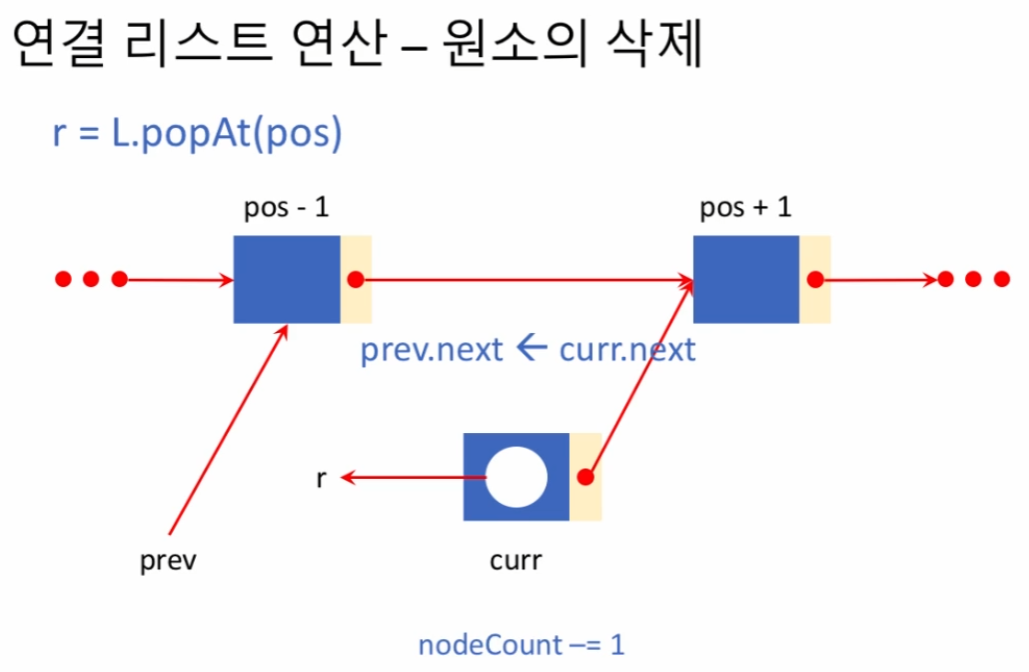

corner case를 생각하자. 

1. 삭제하려는 node가 맨 앞일 때, prev 없고 head 조정 필요. 
2. 리스트 맨 끝의 node 삭제할 때, tail 조정 필요. 
3. 유일한 노드를 삭제할 때 유일한 node가 head이며 tail이다. 둘 다 조정 필요. 

노드의 삽입과 달리 마지막인 tail을 삭제할 때 그 prev를 알 수가 없으므로 O(1)으로 끝낼 수 없다. 

연결리스트 원소 삭제의 복잡도

- 맨 앞을 삭제하는 경우: O(1)
- 중간을 삭제하는 경우: O(n)
- 마지막을 삭제하는 경우: O(n)

## 8.3 두 리스트의 연결

`concat`

`L1`과 `L2`를 잇는다 하면 `L1.tail.next`가 `L2.head`를 가리키면 된다. 

`L1`이 비었거나 `L2`가 빈 경우도 고려해줘야 한다. 


이제 원소의 삭제와 리스트의 연결 모두 구현해보겠다. 

In [298]:
class LinkedList:
    def __init__(self):
        self.nodeCount = 0
        self.head = None
        self.tail = None
        
    def getAt(self, pos):
        if pos <= 0 or pos > self.nodeCount:
            raise Exception('Invalid position')
        
        i = 1
        current = self.head
        while i < pos:
            current = current.next
            i += 1
        
        return current
    
    def traverse(self): 
        ans = []
        
        cursor = self.head
        if cursor is None:
            return ans
        
        while cursor.next is not None:
            ans.append(cursor.data)
            cursor = cursor.next
        else:
            ans.append(cursor.data)
            
        return ans
    
    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1: # position은 1에서부터 센다고 가정함. 1번이 head임. 
            return False
        
        if pos == 1: # 처음
            newNode.next = self.head 
            self.head = newNode
        elif pos == self.nodeCount + 1: # 마지막 
            self.tail.next = newNode
            self.tail = newNode
        else: # 중간 
            prev = self.getAt(pos-1)
            newNode.next = prev.next
            prev.next = newNode
        
        self.nodeCount += 1
        
        return True

    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1: # position은 1에서부터 센다고 가정함. 1번이 head임. 
            return False
        
        if pos == 1: # 처음
            newNode.next = self.head 
            self.head = newNode

        
        return True
    
    def popAt(self, pos):
        if pos < 1 or pos > self.nodeCount:
            raise IndexError
        
        if self.nodeCount == 1:
            popped = self.head
            self.head = None
            self.tail = None
            
            self.nodeCount -= 1
            return popped.data
        
        if pos == 1: # first
            popped = self.head
            self.head = self.head.next
            
            self.nodeCount -= 1
            return popped.data
        
        elif pos == self.nodeCount: # last
            popped = self.tail
            self.tail = self.getAt(pos-1)
            self.tail.next = None
            
            self.nodeCount -= 1
            return popped.data
        
        else: # middle 
            popped = self.getAt(pos)
            prev = self.getAt(pos-1)
            prev.next = popped.next 
            
            self.nodeCount -= 1
            return popped.data
    
    def __repr__(self):
        li = self.traverse()
        return ' --> '.join(li)

In [299]:
L = LinkedList()

first = Node('first')
# second = Node('second')
# third = Node('third')

# first.next = second
# second.next = third

L.head = first
# L.tail = third
L.tail = first

# L.nodeCount = 3
L.nodeCount = 1

In [300]:
L

first

In [301]:
L.popAt(1)

'first'

In [302]:
L

`self.nodeCount` 를 줄여주는 것을 하지 않아 통과하지 못했다. 

꼼꼼하게 return되는 값 말고도 만족되어야 하는 부분이 있으면 살피도록 하자. 

# 9 Linked List 3

Abstract Data Structure인 Linked List는 어디에 쓰이는가? 중간에 뭘 끼고 빼고 그러는 구조일 때. 

삽입과 삭제가 유연하다는 것이 가장 큰 장점이다. 그런데 현재까지의 코드는 `getAt(k)`를 통해 찾고 삽입 삭제를 하는 것이라 효율이 떨어진다. 

따라서 class에 새로운 method를 추가하겠다. 포지션이 아닌 어떤 노드 지정하고 그 앞에 insert하거나 pop하는 것이다. 

- `insertAfter(prev, newNode)`
- `popAfter(prev)`

하지만 이 경우 `prev`가 꼭 존재해야 하기 때문에 맨 앞에 넣기가 힘들다는 단점이 있다. 

그래서 linked list를 조금 변형한다. 

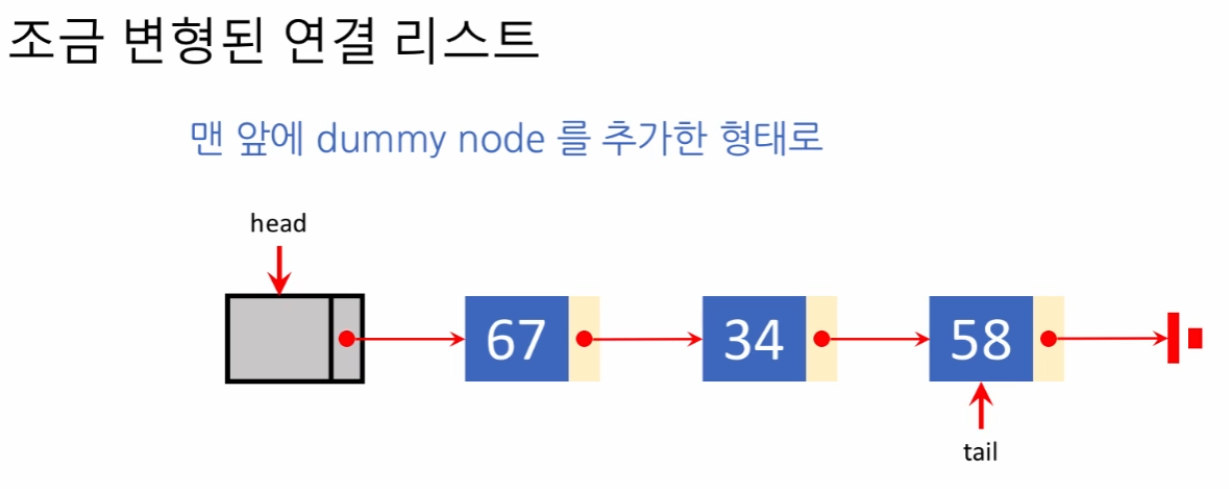

이렇게 dummy node를 추가한 형태로 만들면 항상 처음은 dummy node가 되므로 `prev`는 항상 존재하게 된다. 

연산 정의

1. 길이 얻어내기
2. 리스트 순회
3. 특정 원소 참조 (k번째)
4. 원소 삽입
5. 원소 삭제 
6. 두 리스트 합치기 

아래와 같이 몇 가지 연산을 수정할 수 있다. 

- 우선 `getAt()`에서 dummy node를 가정해 0번째를 호출 시 `self.head`를 반환한다. 
- `insertAfter()`, `popAfter()`를 추가한다. 
- 새롭게 바뀐 여러 경우를 고려한다. 
    - dummy node 말고는 리스트가 비어있는 경우, 
        - 여전히 `self.nodeCount`로 판별 가능. 또는 `self.head.next is None` 으로도 판별 가능. 
        - 새롭게 원소를 뒤에 insert 했을 때 `self.tail`이 포인팅해주도록 하는 것도 잊지 말자. 
    - dummy node와 원소 하나 있는 경우, 
        - 주의해야 할 경우. `self.head.next is self.tail` 이다.
        - `popAfter()` 시 삭제 후 `self.tail`이라는 변수는 이 객체가 아닌 `None`을 가리키도록 바꿔주어야 한다. 
    - dummy node와 원소 두 개 있는 경우 등을 고려해줘야 한다. 
        - `popAfter()` 시 삭제 후 `self.tail`은 `prev`를 pointing 해야 한다. 


여러 가지 있지만 결국 배운 점은 그것이다. 

corner cases를 유형화시켜서 MECE하게, 무엇보다 CE하게 잡아내야 한다. 

그리고나서 각 케이스를 빠르게 눈으로 skim 해가며 적용해보자. 

In [21]:
class LinkedList:
    def __init__(self):
        self.nodeCount = 0
        self.head = Node(None)
        self.tail = None
        self.head.next = self.tail
    
    def traverse(self):
        li = []
        cur = self.head
        while cur.next is not None:
            li.append(cur.next.data)
            cur = cur.next
        
        return li
    
    def getAt(self, pos): # 0번째를 호출할 시 head(dummy node)를 반환하도록 하자. 
        if pos < 0 or pos > self.nodeCount: # 0번째도 호출이 가능하므로. 
            return IndexError
        
        cur = self.head # 이것이 이제 0번이다. 
        for i in range(pos):
            cur = cur.next
        
        return cur
    
    def insertAfter(self, prev, newNode):
        if prev.next is None: # tail 뒤에 넣을 경우 tail도 옮겨줘야 한다. 
            self.tail = newNode
        
        newNode.next = prev.next
        prev.next = newNode
        
        self.nodeCount += 1
        return True
    
    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1:
            return False
        
        if pos != 1 and pos == self.nodeCount + 1: # 이 경우 dummy node말고는 리스트가 비어있기 때문. 
            prev = self.tail
        else:
            prev = self.getAt(pos - 1)
        
        return self.insertAfter(prev, newNode)
    
    def popAfter(self, prev):
        if prev.next is None: # prev is the tail
            return None
        elif prev.next is self.tail: # prev.next is the tail
            popped = prev.next
            if prev is self.head:
                self.head.next = self.tail = None
            else:
                self.tail = prev
                prev.next = None
        else: # prev is the head / middle 
            popped = prev.next
            prev.next = popped.next
        
        self.nodeCount -= 1
        
        return popped.data

    def popAt(self, pos):
        if pos < 1 or pos > self.nodeCount:
            raise IndexError

        return self.popAfter(self.getAt(pos-1))

    def concat(self, L):
        pass
    
    def __repr__(self):
        return ' --> '.join(self.traverse())

테스트 케이스 통과를 못해서 정말 오래 걸렸다. 

문제는 `self.` 를 함수에 적어주지 않아서 그렇다. 

이럴 경우 프로그래머스는 런타임 에러만 띄우지, 왜 그런지 전혀 알려주지 않는다. 

이를 위해 강의자는 `unittest`를 수행할 것을 추천하고 있다. 

이것을 계기로 `pytest`를 포함한 unit test를 익혀보자. 

time complexity를 구하는 것은 그 다음 하도록 하자. 